# visualizations

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
X_train = pd.read_csv('data/X_train.csv', index_col='id')
X_test = pd.read_csv('data/X_test.csv', index_col='id')
y_train = pd.read_csv('data/y_train.csv', index_col='id')
y_test = pd.read_csv('data/y_test.csv', index_col='id')

In [3]:
X_train.head()

,gps_height,installer,longitude,latitude,num_private,basin,region,region_code,district_code,population,...,scheme_management,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type
id,,,,,,,,,,,,,,,,,,,,,
58975,1016,RWE,29.742547,-4.731498,0,Lake Tanganyika,Kigoma,16,3,143,...,VWC,True,1982,gravity,vwc,pay monthly,soft,enough,river,communal standpipe
24148,2173,other,34.644628,-9.619108,0,Lake Nyasa,Iringa,11,4,15,...,VWC,False,2003,gravity,vwc,never pay,soft,enough,spring,communal standpipe
8764,0,other,32.023441,-4.958234,0,Lake Tanganyika,Tabora,14,4,0,...,VWC,True,0,afridev,vwc,never pay,soft,insufficient,shallow well,hand pump
40266,300,LGA,39.082151,-10.863232,0,Ruvuma / Southern Coast,Mtwara,90,33,62,...,VWC,False,2008,gravity,vwc,never pay,soft,insufficient,spring,communal standpipe
21586,1181,other,31.039391,-6.209061,0,Lake Rukwa,Rukwa,15,1,1,...,Water authority,True,2011,other,water authority,never pay,soft,enough,machine dbh,other


In [4]:
y_train.head()

,status_group
id,
58975,functional needs repair
24148,functional
8764,non functional
40266,functional
21586,non functional


In [5]:
df = X_train.merge(y_train, on='id')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40095 entries, 58975 to 23269
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gps_height         40095 non-null  int64  
 1   installer          40095 non-null  object 
 2   longitude          40095 non-null  float64
 3   latitude           40095 non-null  float64
 4   num_private        40095 non-null  int64  
 5   basin              40095 non-null  object 
 6   region             40095 non-null  object 
 7   region_code        40095 non-null  int64  
 8   district_code      40095 non-null  int64  
 9   population         40095 non-null  int64  
 10  public_meeting     40095 non-null  object 
 11  scheme_management  40095 non-null  object 
 12  permit             40095 non-null  object 
 13  construction_year  40095 non-null  int64  
 14  extraction_type    40095 non-null  object 
 15  management         40095 non-null  object 
 16  payment           

# visualizations

### inferential plots

In [7]:
# creating variable viz_df for our status group map visual
viz_df = df.copy(deep=True)
viz_df = viz_df.drop(viz_df[viz_df['longitude']==0].index)

In [8]:
# color palette as dictionary
palette = {"functional":"xkcd:soft green",
"non functional":"xkcd:light red",
"functional needs repair":"xkcd:cerulean"}

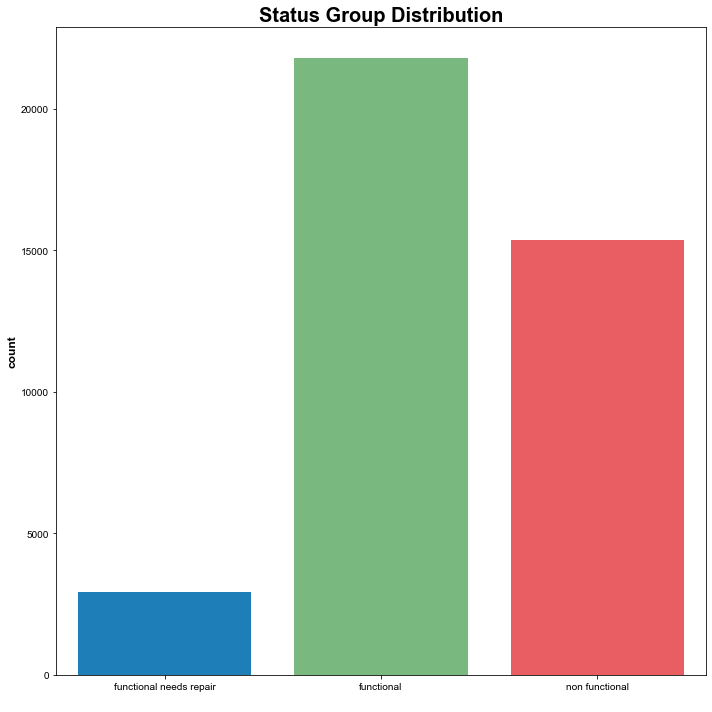

In [9]:
fig = plt.figure(figsize=(10,10))
ax = sns.countplot(x='status_group', palette=palette, data=df)
sns.set_style('dark')
plt.xlabel(" ", fontweight='bold', size=12)
plt.ylabel("count", fontweight='bold', size=12)
plt.title('Status Group Distribution',fontweight='bold', size=20)
plt.tight_layout()

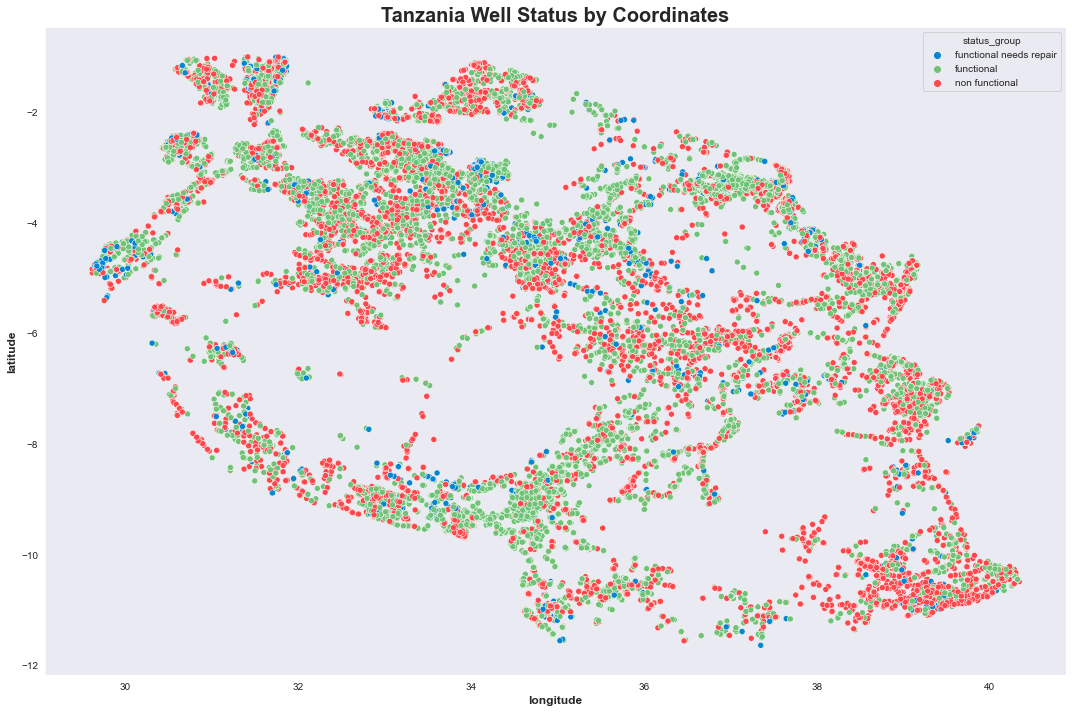

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x='longitude', y='latitude', hue='status_group', palette=palette, sizes=(1, 8), data=viz_df, ax=ax)
sns.set_style("darkgrid")
plt.xlabel("longitude", fontweight='bold', size=12)
plt.ylabel("latitude", fontweight='bold', size=12)
plt.title('Tanzania Well Status by Coordinates',fontweight='bold', size=20)
plt.tight_layout()

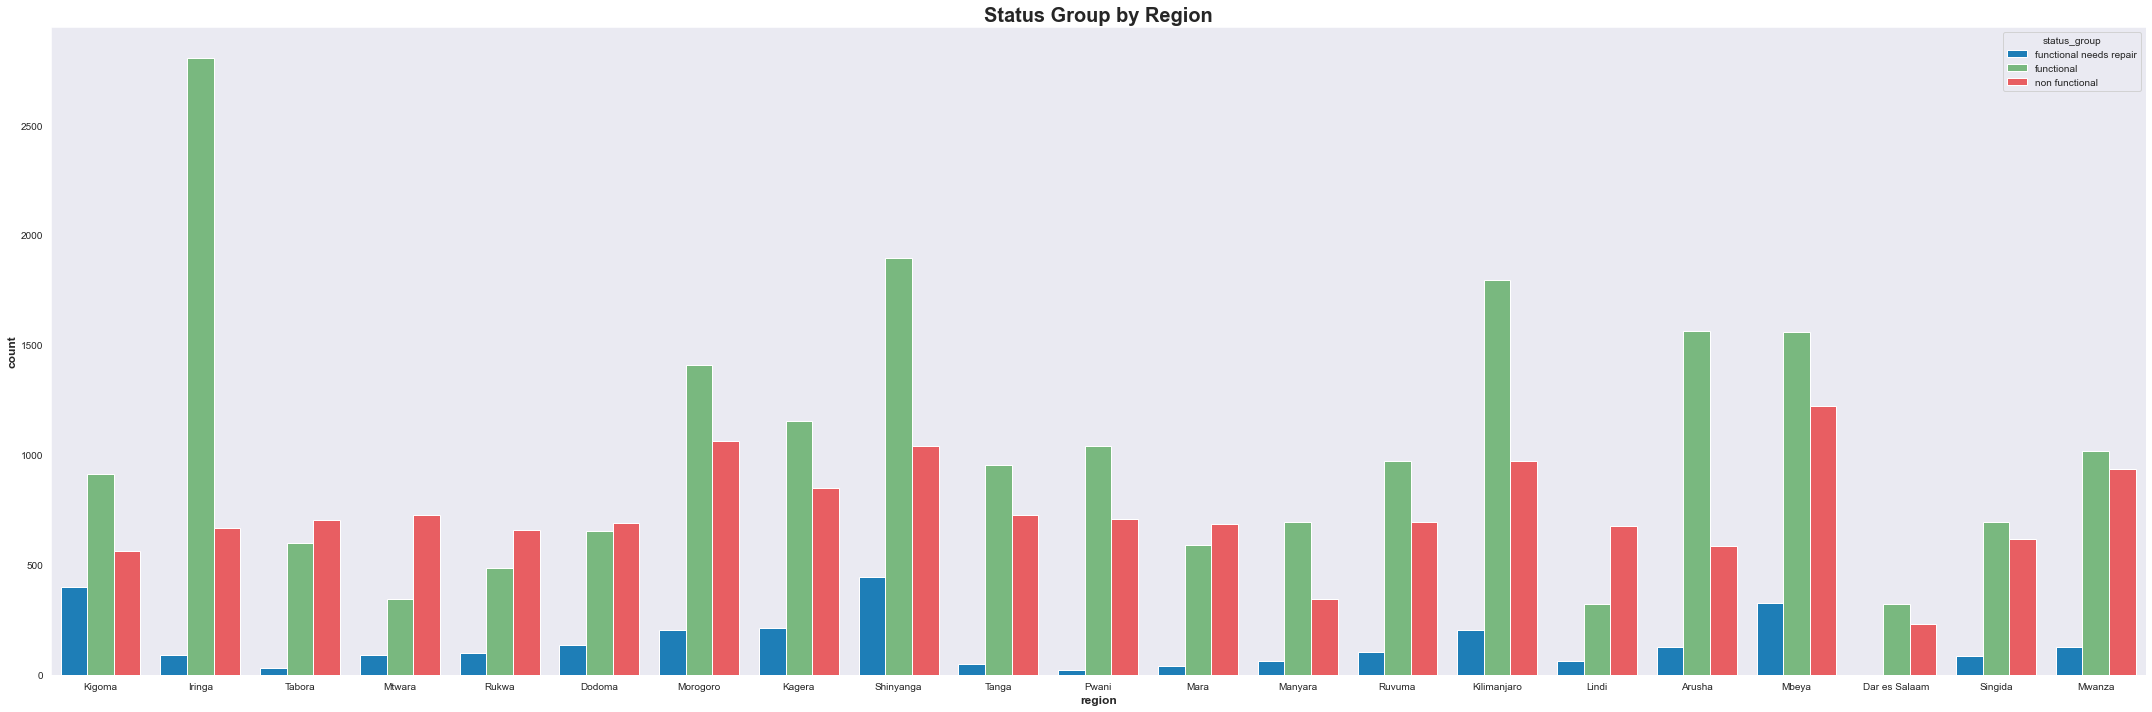

In [13]:
plt.figure(figsize=(30,10))
sns.set_style(style='dark')
ax = sns.countplot(x='region', hue="status_group", palette=palette,data=df)
plt.xlabel("region", fontweight='bold', size=12)
plt.ylabel("count", fontweight='bold', size=12)
plt.title('Status Group by Region', fontweight='bold', fontsize=20)
plt.tight_layout();

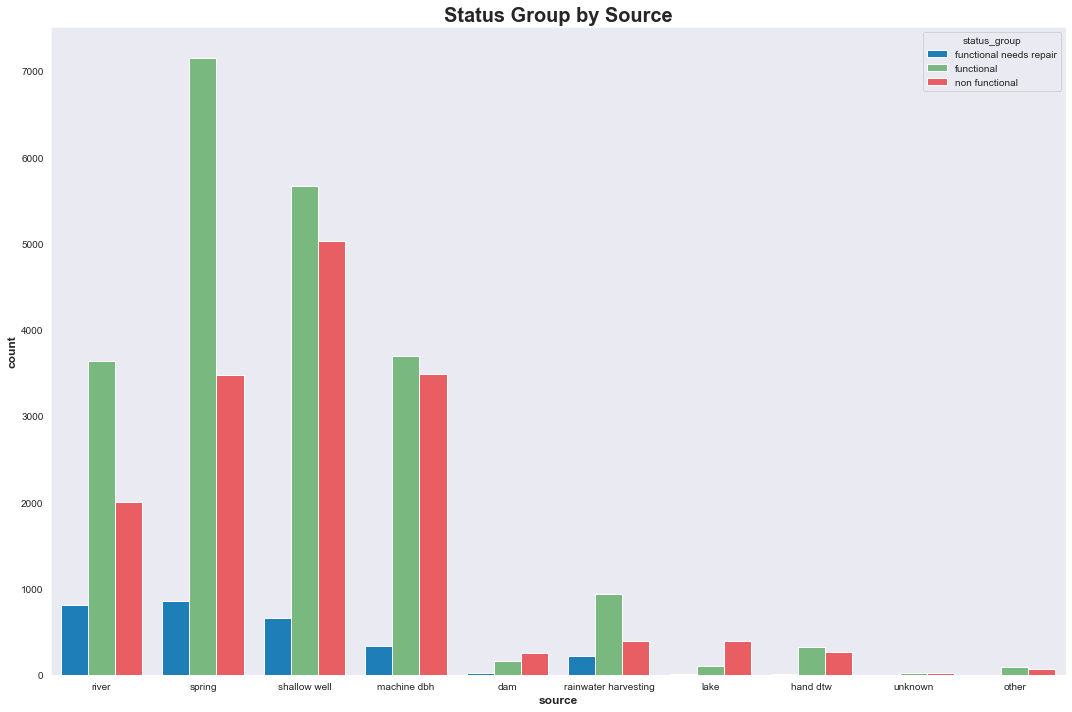

In [15]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='source', hue="status_group", palette=palette,data=df)
plt.xlabel("source", fontweight='bold', size=12)
plt.ylabel("count", fontweight='bold', size=12)
plt.title('Status Group by Source',fontweight='bold', size=20)
plt.tight_layout();

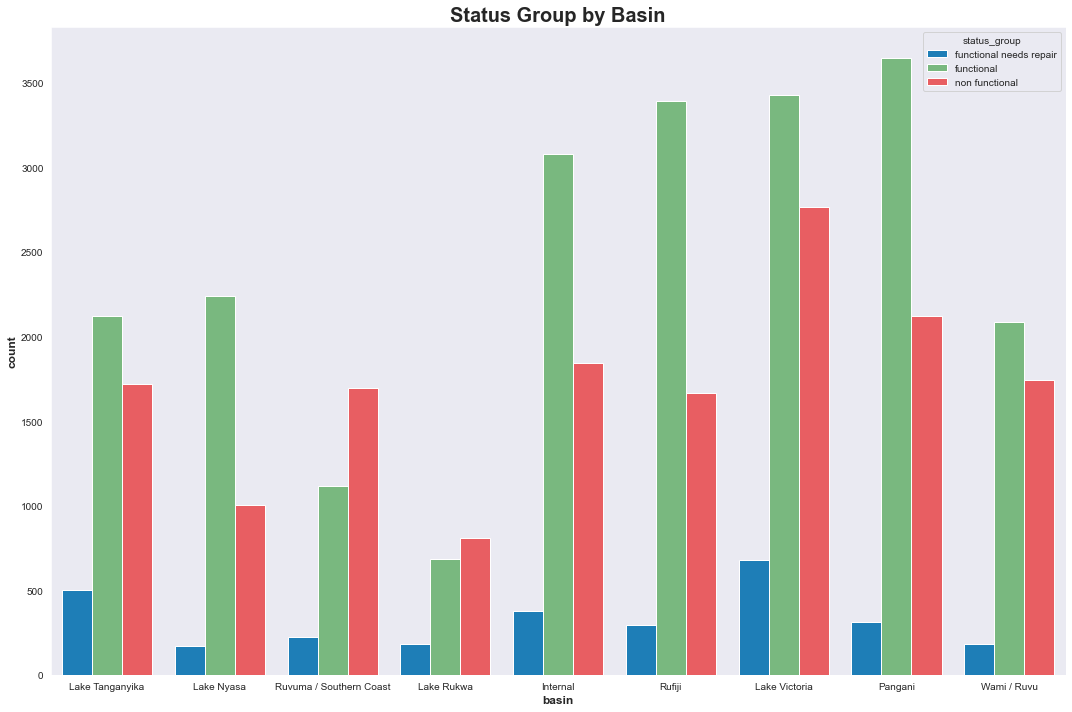

In [17]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='basin', hue="status_group", palette=palette,data=df)
plt.xlabel("basin", fontweight='bold', size=12)
plt.ylabel("count", fontweight='bold', size=12)
plt.title('Status Group by Basin',fontweight='bold', size=20)
plt.tight_layout()

In [18]:
fig.savefig('images/05_status_group_by_basin.png');

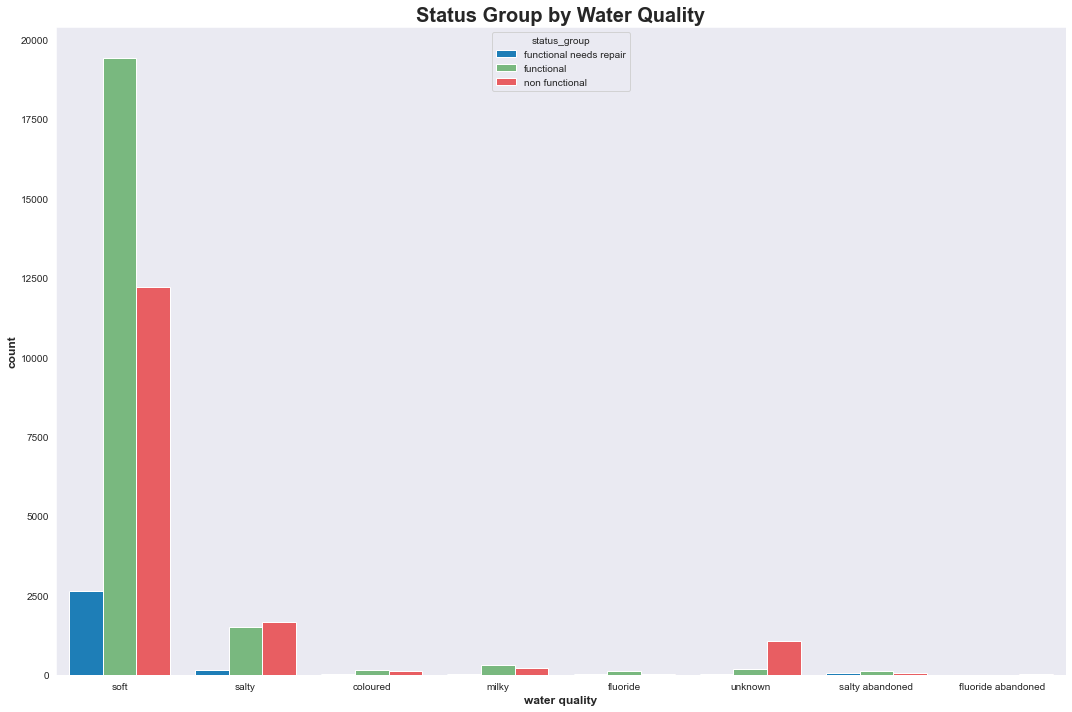

In [19]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='water_quality', hue="status_group", palette=palette,data=df)
plt.xlabel("water quality", fontweight='bold', size=12)
plt.ylabel("count", fontweight='bold', size=12)
plt.title('Status Group by Water Quality',fontweight='bold', size=20)
plt.tight_layout()

In [21]:
df.columns

Index(['gps_height', 'installer', 'longitude', 'latitude', 'num_private',
       'basin', 'region', 'region_code', 'district_code', 'population',
       'public_meeting', 'scheme_management', 'permit', 'construction_year',
       'extraction_type', 'management', 'payment', 'water_quality', 'quantity',
       'source', 'waterpoint_type', 'status_group'],
      dtype='object')

In [22]:
df_copy = df.copy(deep=True)
df_copy = df_copy[df_copy['construction_year'] != 0]
df_copy['decade'] = df_copy['construction_year']

In [23]:
df_copy['decade'].replace((1960,1961,1962,1963,1964,1965,1966,1967,1968,1969), '60s', inplace = True)
df_copy['decade'].replace((1970,1971,1972,1973,1974,1975,1976,1977,1978,1979), '70s', inplace = True)
df_copy['decade'].replace((1980,1981,1982,1983,1984,1985,1986,1987,1988,1989), '80s', inplace = True)
df_copy['decade'].replace((1990,1991,1992,1993,1994,1995,1996,1997,1998,1999), '90s', inplace = True)
df_copy['decade'].replace((2000,2001,2002,2003,2004,2005,2006,2007,2008,2009), '00s', inplace = True)
df_copy['decade'].replace((2010,2011,2012,2013,), '10s', inplace = True)

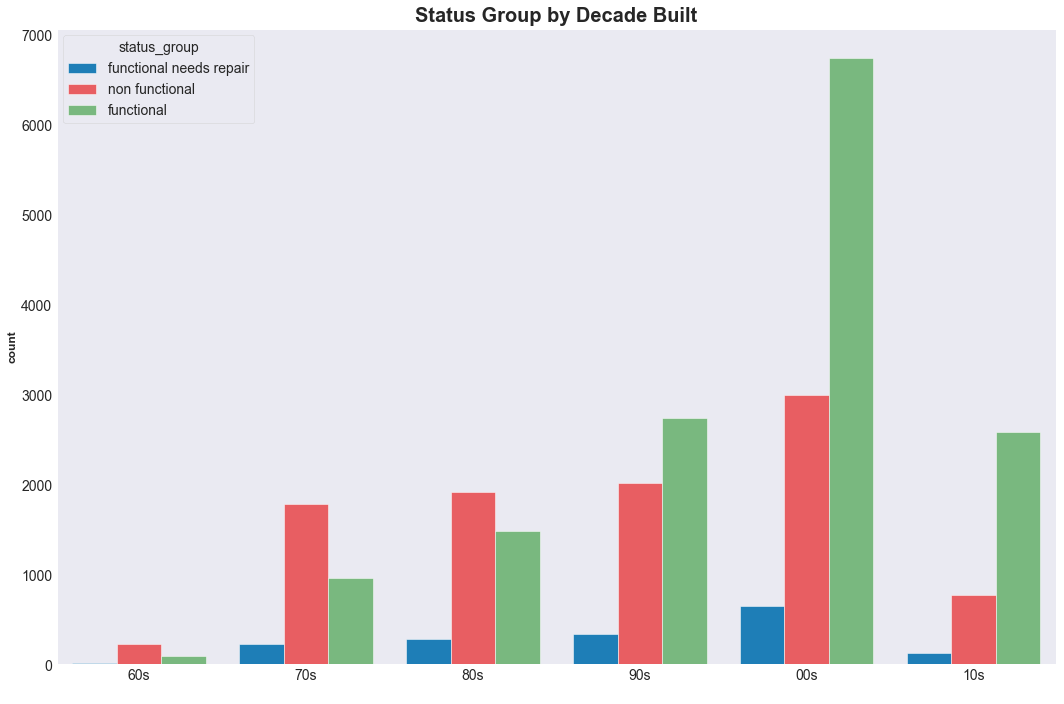

In [33]:
plt.figure(figsize = (15,10))
sns.countplot('decade', hue='status_group', palette=palette, data=df_copy, order=['60s', '70s', '80s', '90s', '00s', '10s'],
              hue_order=['functional needs repair', 'non functional', 'functional'])
plt.xlabel(" ", fontweight='bold', size=12)
plt.ylabel("count", fontweight='bold', size=12)
plt.title('Status Group by Decade Built',fontweight='bold', size=20)
plt.tight_layout()

In [26]:
df_copy_2 = df.copy(deep=True)
df_copy_2['installer'].replace(to_replace='0', value='missing', inplace=True)
df_copy_2['installer'].replace('Gover', 'Government', inplace=True)
df_copy_2['installer'].replace('Commu', 'Community')
df_copy_2['installer'].replace('District council', 'District Council', inplace=True)

In [27]:
toptwenty_installers = list(df_copy_2.installer.value_counts()[:21].index)
df_copy_2.installer = df_copy_2.installer.apply(lambda x: x if x in toptwenty_installers else 'other')
df_copy_2 = df_copy_2[df_copy_2.installer != 'other']

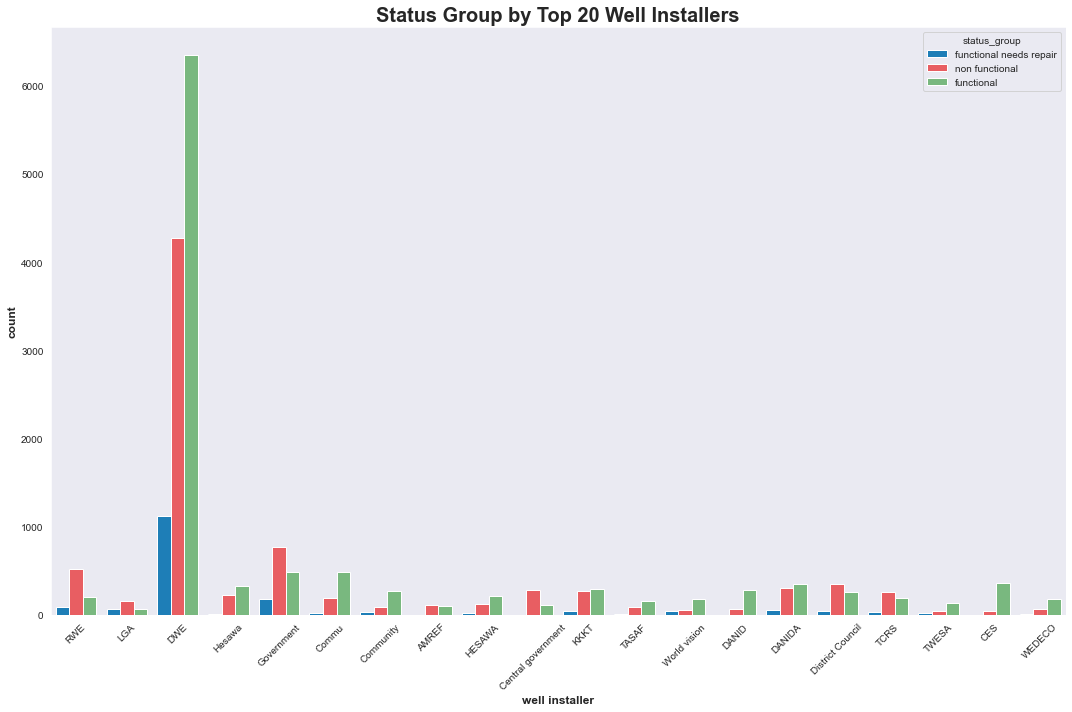

In [28]:
plt.figure(figsize = (15,10))
sns.countplot(x='installer', hue='status_group', palette=palette, data=df_copy_2, 
              hue_order=['functional needs repair', 'non functional', 'functional'])
plt.xlabel("well installer", fontweight='bold', size=12)
plt.xticks(rotation=45)
plt.ylabel("count", fontweight='bold', size=12)
plt.title('Status Group by Top 20 Well Installers',fontweight='bold', size=20)
plt.tight_layout()

In [30]:
df_results = pd.DataFrame(columns=['status', 'percent correct'])
df_results = df_results.append({
    'status' : 'functional',
    'percent correct' : 72.68,
}, ignore_index=True)
df_results = df_results.append({
    'status' : 'functional needs repair',
    'percent correct' : 69.58
}, ignore_index=True)
df_results = df_results.append({
    'status' : 'non-functional',
    'percent correct' : 67.54
}, ignore_index=True)

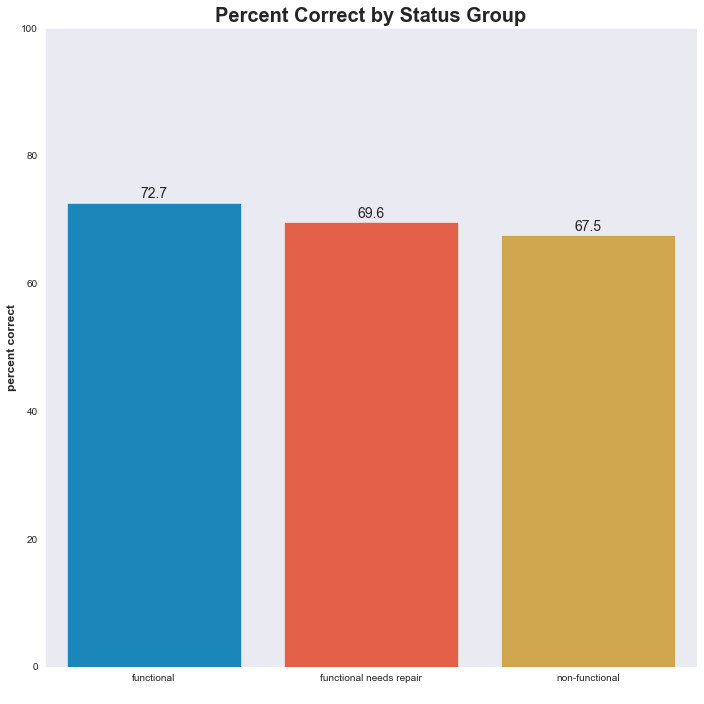

In [31]:
fig, ax = plt.subplots(figsize = (10,10))
plt.style.use('fivethirtyeight')
sns.set_style('dark')
splot = sns.barplot(x='status', y='percent correct', data=df_results)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax.set_ylim(0, 100)
plt.xlabel(" ", fontweight='bold', size=12)
plt.ylabel("percent correct", fontweight='bold', size=12)
plt.title('Percent Correct by Status Group',fontweight='bold', size=20)
plt.tight_layout()